## Task 3: Exploratory Data Analysis (EDA)

##### Aim: To perform EDA on retail dataset to find the areas to gain more profit

Data can be found at: : https://bit.ly/3i4rbWl

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#reading the data
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
#checking missing values
print ("\nMissing values :  ", df.isnull().sum().values.sum())


Missing values :   0


##### There are no missing values in  the dataset.

In [6]:
#checking duplicate values
df.duplicated().sum()

17

In [7]:
#drop the duplicate values
df=df.drop_duplicates()
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


##### Since the dataset is for United states only, and the postal codes and the city column will ne providing the same information we can drop one of the columns

In [8]:
df=df.drop(['Country'],axis=1)
df=df.drop(['Postal Code'],axis=1)
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   City          9977 non-null   object 
 3   State         9977 non-null   object 
 4   Region        9977 non-null   object 
 5   Category      9977 non-null   object 
 6   Sub-Category  9977 non-null   object 
 7   Sales         9977 non-null   float64
 8   Quantity      9977 non-null   int64  
 9   Discount      9977 non-null   float64
 10  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 935.3+ KB


 ## Descriptive Statistics

In [10]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [11]:
df.describe(include='object')

,Ship Mode,Segment,City,State,Region,Category,Sub-Category
count,9977,9977,9977,9977,9977,9977,9977
unique,4,3,531,49,4,3,17
top,Standard Class,Consumer,New York City,California,West,Office Supplies,Binders
freq,5955,5183,914,1996,3193,6012,1522


In [12]:
#analysing the correlations
corr=df.corr()
corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


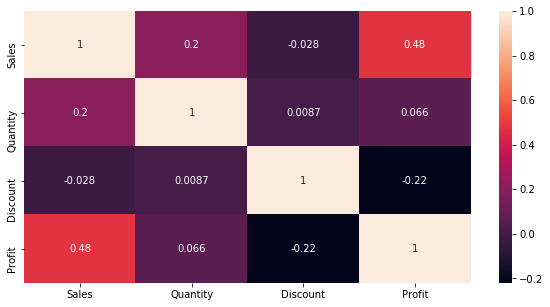

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot = True)
plt.show()

In [14]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

### Data Visualization

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text xticklabel objects>)

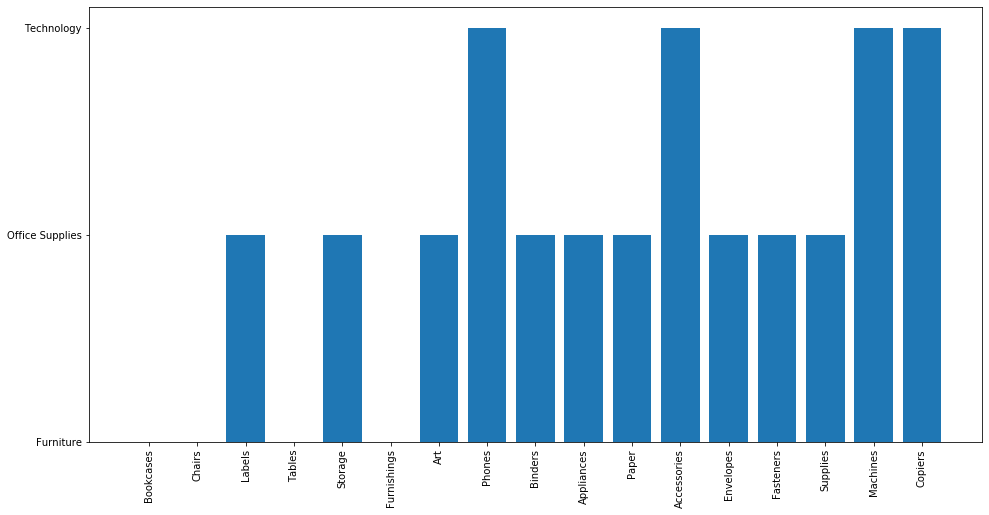

In [15]:
#plot bar chart
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=df)
plt.xticks(rotation=90)

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64


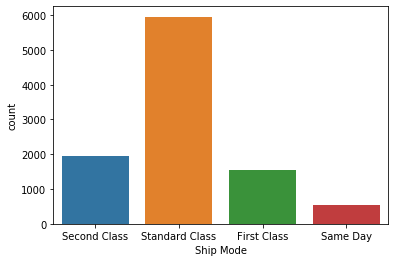

In [16]:
#frequency plot
print(df['Ship Mode'].value_counts())
sns.countplot('Ship Mode',data=df)

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64


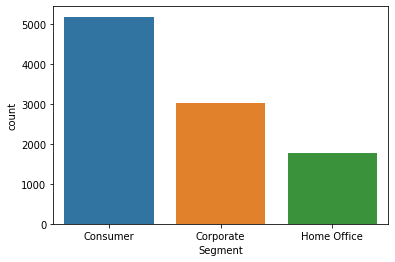

In [17]:
print(df['Segment'].value_counts())
sns.countplot('Segment',data=df)

New York City    914
Los Angeles      746
Philadelphia     536
San Francisco    506
Seattle          424
                ... 
Baytown            1
Commerce City      1
Norfolk            1
Missouri City      1
Deer Park          1
Name: City, Length: 531, dtype: int64


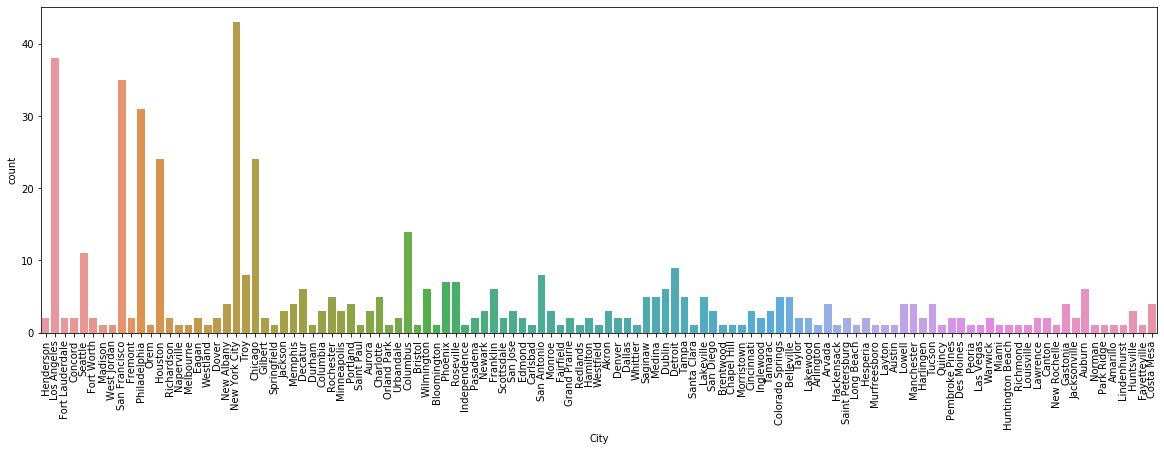

In [18]:
print(df['City'].value_counts())
plt.figure(figsize=(20,6))
sns.countplot('City',data=df.head(500))
plt.xticks(rotation=90)
plt.show()

In [19]:
print(df['State'].value_counts())

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

<function matplotlib.pyplot.show(*args, **kw)>

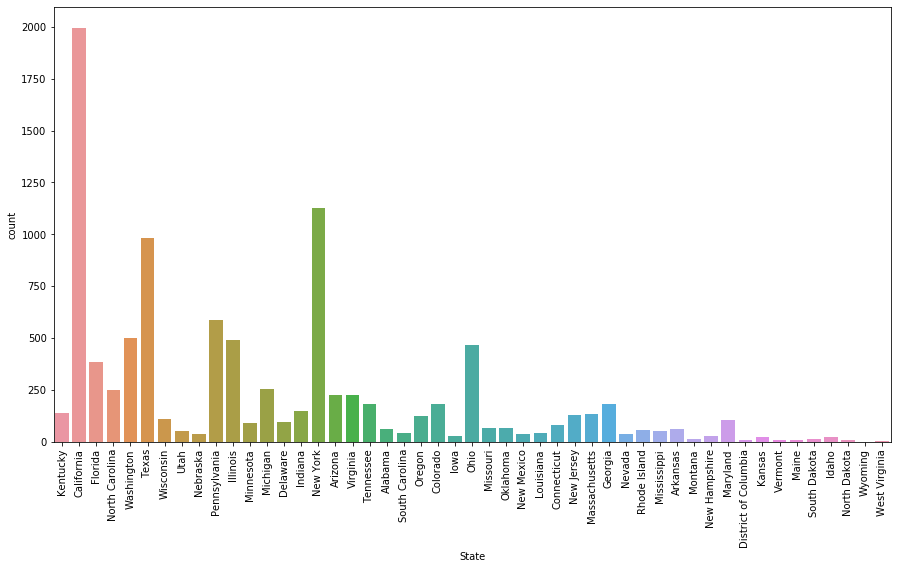

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(df['State'])
plt.xticks(rotation=90)
plt.show

### Supply to the south region should be improved

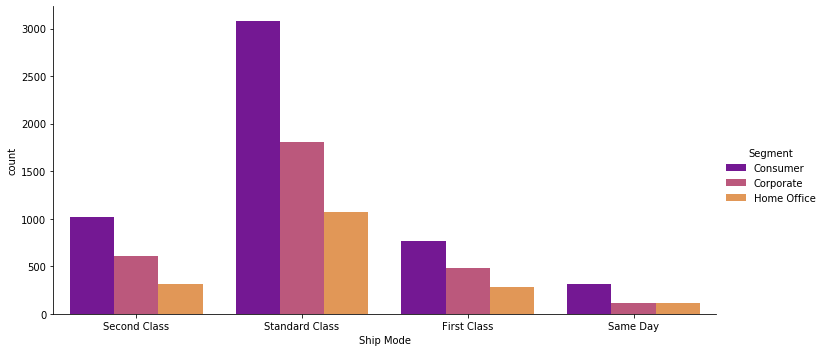

In [21]:
sns.catplot("Ship Mode",data=df,hue='Segment',kind="count",palette="plasma",aspect=2,height=5)

In [22]:
storegroup=df.groupby("Segment")["Quantity"].sum().reset_index()
storegroup

,Segment,Quantity
0,Consumer,19497
1,Corporate,11591
2,Home Office,6732


([<matplotlib.patches.Wedge at 0x220a8dde648>,
 [Text(-0.05410243658817879, 1.108680714342602, 'Consumer'),
  Text(-0.5423093508382759, -0.9685042942565448, 'Corporate'),
  Text(0.9409204909332646, -0.5888706392255472, 'Home Office')])

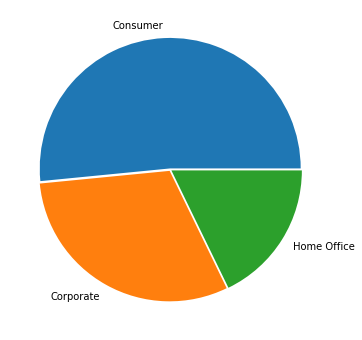

In [23]:
labels=df['Segment'].unique()
plt.figure(figsize=(8,6))
plt.pie(storegroup['Quantity'],labels=labels,explode=(0.01,0.01,0.01))

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64


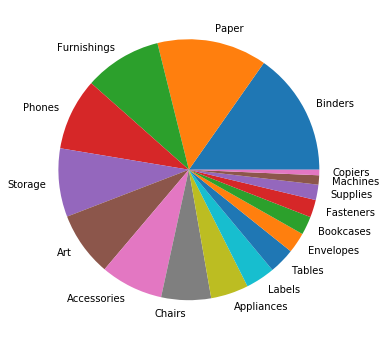

In [24]:
print(df['Sub-Category'].value_counts())
plt.figure(figsize=(12,6))
plt.pie(df['Sub-Category'].value_counts(),labels=df['Sub-Category'].value_counts().index)
plt.show()

## Analysis of Profits

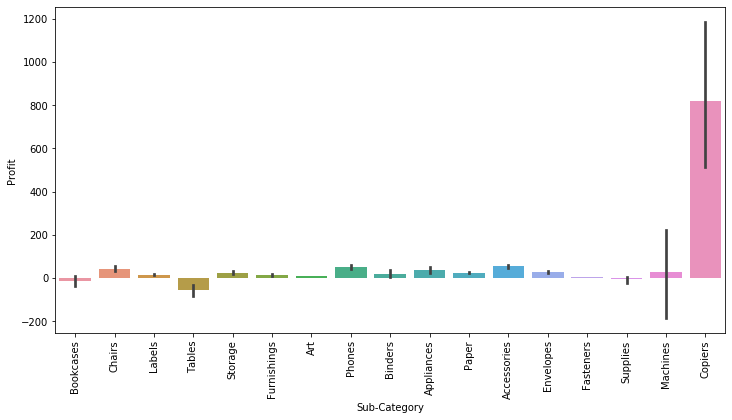

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x='Sub-Category',y='Profit',data=df)
plt.xticks(rotation=90)
plt.show()

#### Conclusions:
##### Copiers should be improved 
##### Supply to the south region should be increased
##### Table sales operation should be reduced 
##### Number of people working for copiers should be increased for more profits
##### We have to look for furniture and technology sales